# A more advanced YaSoFo example

(Tested with YaSoFo v1.3.0)

In this example, you will learn how to do a series of calculations with YaSoFo, varying one parameter.
The system will be a double junction cell under AM1.5G illumination, with a very good catalyst and intended
for water splitting. The parameter, that we change, is the ohmic resistivity. At the end, we will plot the
results.
Prerequisites: You have installed [SciPy](https://scipy.org/) (Python 3.x version) on your computer and obtained YaSoFo
from https://bitbucket.org/YaSoFo/yasofo . You have started a Python 3 shell, such as ipython, in the directory
where the files yasofo.py and am15g.dat are located.

In [1]:
# remove the following line for plots in a separate window
%matplotlib inline
# change to yasofo root dir:
import sys
sys.path.append('../')
import yasofo as yo

Spectrum successfully imported. Length: 120 points.
Integrated power: 1000.000 W/m^2. Expected: 1000 W/m^2.
Standard for efficiency calculation assumes 1000 W/m^2!
Length: 120 points. Recommended: 200-500.
This is YaSoFo version 1.2.11


We can check if things are working by plotting the AM1.5G spectrum:

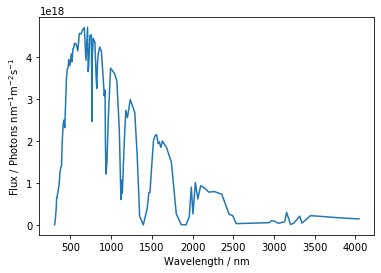

In [2]:
yo.am15g.plot()

Okay, that works. So let us plot the possible bandgap combinations for a double junction cell with the
resulting efficiencies for solar water splitting. By not specifying any parameters, the standard settings are
used, i.e. AM1.5G, IrO2 as a catalyst, no ohmic drop, and the detailed-balance optimum for the photovoltage (as opposed to a constant loss per junction).

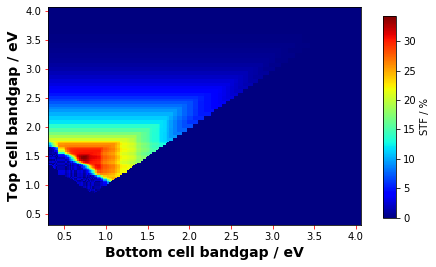

In [3]:
double_junction = yo.best_gaps_double()

These are the standard plotting settings. If you want to control the settings for your plot, have a look
at the [matplotlib documentation](https://matplotlib.org/2.0.0/index.html). The computed data is stored in the variable ‘double junction’, we just
created. Let’s say we want to study the impact of an ohmic drop from 0 to 25 Ohm in steps of 5 Ohm. We
first create an array with the corresponding values:

In [4]:
import numpy as np
ohmic_drop = np.arange(0, 25.1, 5)
print(ohmic_drop)

[ 0.  5. 10. 15. 20. 25.]


Above you see the values for the ohmic drop that will be tested. Now here the actual calculation, together
with plotting:

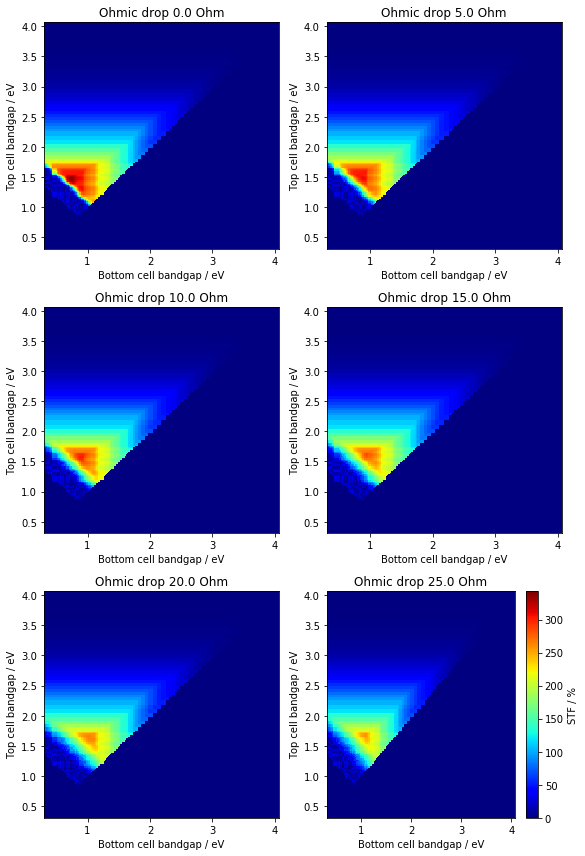

In [5]:
import math
import matplotlib.pyplot as plt
nrows = int(math.ceil(len(ohmic_drop) / 2.))
efficiencies = []
local_catparameters = yo.cat_odrop
for drop in ohmic_drop:
    local_catparameters[2] = drop
    efficiencies.append(yo.best_gaps_double(cat_para=local_catparameters, plotting=False))
# now we have the data, lets plot it nicely
fig, axes = plt.subplots(nrows, ncols=2, figsize=(8, 12))
for ax, efficiency, drop in zip(axes.flat, efficiencies, ohmic_drop):
# we’re setting the colour scale to be the same for all,
# i.e. first dataset
    p = ax.pcolor(efficiency['gap_axis'],efficiency['gap_axis'],efficiency['efficiency']*1000,
        cmap=plt.cm.jet, vmin=abs(efficiencies[0]['efficiency']*1000).min(),
        vmax=abs(efficiencies[0]['efficiency']*1000).max())
    ax.set_xlabel("Bottom cell bandgap / eV")
    ax.set_ylabel("Top cell bandgap / eV")
    ax.set_title("Ohmic drop %.1f Ohm" %drop)
plt.tight_layout()
cb = plt.colorbar(p)
cb.set_label("STF / %")
plt.show(p)

So we see that the max. efficiency is constantly decreasing with solution resistance. Not so surprising. . .
Such a looping can be done with any kind of parameter in the model.